In [1]:
import numpy as np
from pymcmcstat.MCMC import MCMC
import matplotlib.pyplot as plt
import pymcmcstat
from ebm import EBM
from pymcmcstat.plotting import MCMCPlotting
print(pymcmcstat.__version__)

plt.style.use("plots.mplstyle")

1.9.1


In [2]:
# real data
data = np.load("data/h_Q_CNRM-CM5.npz")
h = data["h"]
x = data["x"]
Q = data["Q"]
hs = h[0]
hn = h[-1]
D = 2.6e-4*np.ones(len(x))

# solve
ebm = EBM(x, Q, D, hs, hn)
h_tilde = ebm.solve()

In [3]:
def modelfun(x, theta):
    ebm = EBM(x.flatten(), Q, theta, hs, hn)
    return ebm.solve()

def ssfun(theta,data):
    # sum-of-squares function for algae example
    ndp, nbatch = data.shape[0]
    ydata = data.ydata[0][:, 0]
    xdata = data.xdata[0]
    # evaluate model
    ymodel = modelfun(xdata, theta)
    res = ymodel - ydata.reshape(ymodel.shape)
    ss = (res**2).sum(axis=0)
    return ss  

In [4]:
# Initialize MCMC object
mcstat = MCMC()
# Next, create a data structure for the observations and control
# variables. Typically one could make a structure |data| that
# contains fields |xdata| and |ydata|.
ndp = len(x)
x = x.reshape(ndp, 1) # enforce column vector
y = h.reshape(ndp, 1) # enforce column vector
# data structure 
mcstat.data.add_data_set(x,y)
# add model parameters
for i in range(ndp):
    mcstat.parameters.add_model_parameter(name='D'+str(i), theta0=D[i], minimum=0)

# Generate options
mcstat.simulation_options.define_simulation_options(
    nsimu=1.0e3, updatesigma=True)
# Define model object:
mcstat.model_settings.define_model_settings(
    sos_function=ssfun)

In [5]:
# check model evaluation
ss = ssfun(D, mcstat.data)
print('ss = {}'.format(ss))

ss = [1.11592679e+11]


In [6]:
# Run simulation
mcstat.run_simulation()
# Rerun starting from results of previous run
mcstat.simulation_options.nsimu = int(5.0e3)
mcstat.run_simulation(use_previous_results=True)


Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
        D0:  2.60e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D1:  2.60e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D2:  2.60e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D3:  2.60e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D4:  2.60e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D5:  2.60e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D6:  2.60e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D7:  2.60e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D8:  2.60e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D9:  2.60e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
       D10:  2.60e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
       D11:  2.60e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
       D12:  2.60e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
       D13:  2.60e-

 [---               8%                  ] 84 of 1000 complete in 1.0 secadjusted covariance matrix
 [-------          20%                  ] 201 of 1000 complete in 2.5 secadjusted covariance matrix
 [-----------------100%-----------------] 1000 of 1000 complete in 10.3 sec
Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
        D0:  6.09e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D1:  6.46e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D2:  6.80e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D3:  5.71e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D4:  6.46e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D5:  6.43e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D6:  2.81e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D7:  3.93e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D8:  5.32e-04 [ 0.00e+00,       inf] N( 0.00e+00,      inf)
        D9:  2.96

 [-----------------100%-----------------] 5000 of 5000 complete in 66.2 sec

In [7]:
# extract info from results
results = mcstat.simulation_results.results
burnin = int(results['nsimu']/2)
chain = results['chain'][burnin:, :]
s2chain = results['s2chain'][burnin:, :]
names = results['names'] # parameter names

# display chain stats
mcstat.chainstats(chain, results)

#from pymcmcstat import mcmcplot as mcp
#settings = dict(
#    fig=dict(figsize=(20, 20))
#)
# plot chain panel
# mcp.plot_chain_panel(chain, names, settings)
# plot density panel
# mcp.plot_density_panel(chain, names, settings)
# pairwise correlation
# f = mcp.plot_pairwise_correlation_panel(chain, names, settings)



------------------------------
      name:      mean       std    MC_err       tau    geweke
        D0:  8.69e-04  3.35e-05  7.06e-06    388.96      0.94
        D1:  8.57e-04  1.57e-05  2.41e-06    103.70      1.00
        D2:  1.11e-03  7.35e-05  1.61e-05    454.64      0.87
        D3:  8.96e-04  1.91e-05  2.92e-06    111.97      0.99
        D4:  3.86e-04  4.64e-05  9.91e-06    468.11      0.75
        D5:  8.30e-04  3.37e-05  7.02e-06    447.30      0.93
        D6:  1.76e-04  1.06e-05  1.89e-06    117.80      0.89
        D7:  6.32e-04  3.06e-05  6.46e-06    415.45      0.92
        D8:  5.86e-04  2.68e-05  5.61e-06    433.60      0.84
        D9:  4.58e-04  2.34e-05  4.56e-06    295.79      0.90
       D10:  3.91e-05  2.87e-05  6.18e-06    466.74      0.06
       D11:  3.25e-04  1.63e-05  3.33e-06    224.45      0.94
       D12:  1.94e-04  1.05e-05  2.21e-06    333.99      0.86
       D13:  4.00e-04  2.02e-05  3.81e-06    136.08      0.89
       D14:  5.65e-04  2.73e-05  6.09

In [8]:
from pymcmcstat import propagation as up

def predmodel(q, data):
    xdata = data.xdata[0]
    ymodel = modelfun(xdata, q)
    return ymodel

pdata = mcstat.data
intervals = up.calculate_intervals(chain, results, pdata, predmodel,
                                  waitbar=True, s2chain=s2chain)

 [-----------------100%-----------------] 500 of 500 complete in 3.4 sec

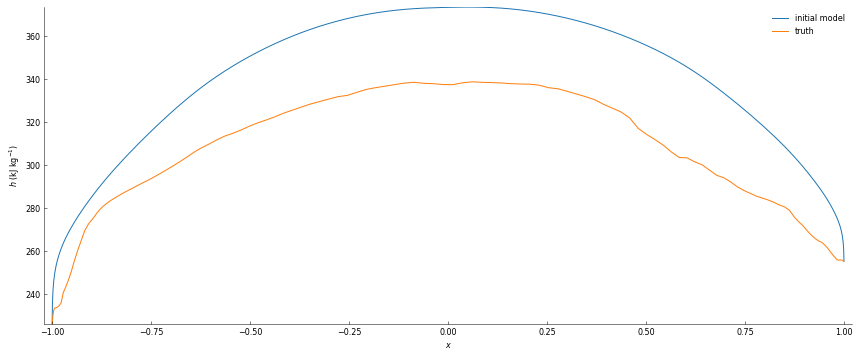

Text(0.5, 0, 'x')

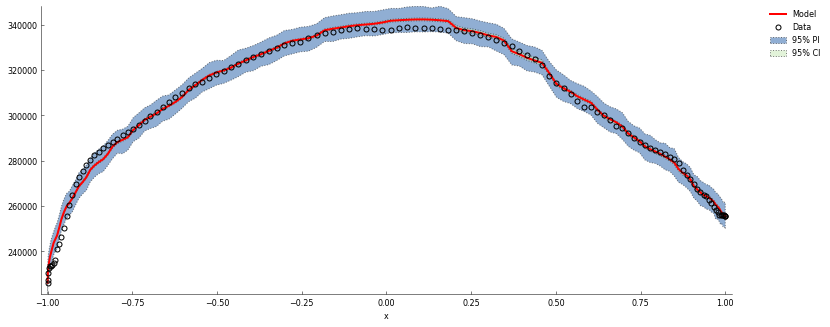

In [9]:
# plot
plt.figure(figsize=(12, 5))
plt.plot(x, h_tilde/1e3, label="initial model")
plt.plot(x, h/1e3, label="truth")
plt.xlabel("$x$")
plt.ylabel("$h$ (kJ kg$^{-1}$)")
plt.legend()
plt.tight_layout()
plt.show()

data_display = dict(
    marker='o',
    color='k',
    mfc='none',
    label='Data')
model_display = dict(
    color='r')
interval_display = dict(
    alpha=0.5)

fig, ax = up.plot_intervals(intervals,
                            time=mcstat.data.xdata[0],
                            ydata=mcstat.data.ydata[0][:, 0],
                            xdata=mcstat.data.xdata[0],
                            data_display=data_display,
                            model_display=model_display,
                            interval_display=interval_display,
                            ciset=dict(colors=['#c7e9b4']),
                            piset=dict(colors=['#225ea8']),
                            figsize=(12, 5))
ax.set_ylabel('')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('x')